In [4]:
from ipynb.fs.full._02_Theory_Discretistion_RENAME import *
from ipynb.fs.full.Background_Functions import *

writeDimensions(10, 10)

# Cells with no Boundaries

<!-- So now it's time to code this matrix: 

The derived expressions are for each cell with a $N$, $S$, $E$ & $W$ cell. That means there expressions are only true for the mesh points that are: not on the boundary; and a cell centre on the boundary: -->

Firstly let's visualise the cells without boundaries:


10 10 10 10


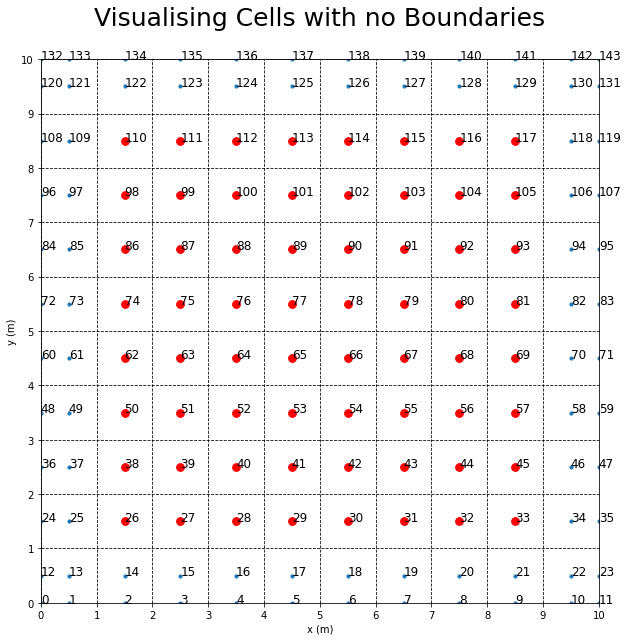

In [5]:
Lx, Ly, nx, ny = 10, 10, 10, 10

writeDimensions(nx, ny)

from ipynb.fs.full.Background_Functions import *

visualiseCellsNoBoundaries(Lx, Ly, nx, ny)


The descretization of the unkown (LHS) partial derivatives in the x-equation $\left( \dfrac{\delta u}{\delta y}_N , \dfrac{\delta u}{\delta y}_S , \dfrac{\delta u}{\delta x}_E , \dfrac{\delta u}{\delta x}_W \right)$ and the y-equation $\left( \dfrac{\delta v}{\delta y}_N , \dfrac{\delta v}{\delta y}_S , \dfrac{\delta v }{\delta v}_E , \dfrac{\delta v}{\delta x}_W \right)$ are approximated as the difference between the displacement at cell P and the neighbouring cell, divided by the distance between them: 


******Note on direction

<!-- +

\mu \left( \dfrac{\delta u}{\delta y} \right)
 _S |S_S|
- 

(2\mu + \lambda)
\left(\dfrac{\delta u}{\delta x} \right)
 _E |S_E|

+ 

(2\mu + \lambda)
\left(\dfrac{\delta u}{\delta x}\right) 
 _W |S_W|
)  -->


<img src="./Paper_Images/mesh_displacements.png" alt="Drawing" style="width: 600px;"/> 
<img src="./Paper_Images/partial_derivatives_mesh.png" alt="Drawing" style="width: 600px;"/> 

### x-equation:

$$


\frac{\rho}{\Delta t^2} \left( u_p^n V^n \right) 

-

\mu \left( \dfrac{\delta u}{\delta y} \right)
_N |S_N|

+

\mu \left( \dfrac{\delta u}{\delta y} \right)
 _S |S_S|
- 

(2\mu + \lambda)
\left(\dfrac{\delta u}{\delta x} \right)
 _E |S_E|

+ 

(2\mu + \lambda)
\left(\dfrac{\delta u}{\delta x}\right) 
 _W |S_W|

= RHS

$$


$$

\frac{\rho}{\Delta t^2} \left( u_P^n V^n \right) 

-

\mu \left( \dfrac{ u_N - u_P }{dy} \right)
 |S_N|

+

\mu \left( \dfrac{ u_P - u_S }{dy} \right)
  |S_S|
- 

(2\mu + \lambda)
\left(\dfrac{ u_E - u_P}{dx} \right)
  |S_E|

+ 

(2\mu + \lambda)
\left(\dfrac{ u_P - u_W}{dx}\right) 
  |S_W|

= 
RHS

$$

<!-- $$

u_P \left[

\frac{\rho}{\Delta t^2} V^n

+ 

\dfrac{\mu |S_N|}{dy} 

+

\dfrac{\mu |S_S|}{dy} 

+

\dfrac{(2\mu + \lambda) |S_E|}{dx}

+

\dfrac{(2\mu + \lambda) |S_W|}{dx}

\right]

-

u_N \dfrac{\mu |S_N|}{dy}

-

u_S \dfrac{\mu |S_S|}{dy}

- 

u_E \dfrac{(2\mu + \lambda) |S_E|}{dx} 

- 

u_W \dfrac{(2\mu + \lambda) |S_W|}{dx} 

= 
RHS

$$ -->

<!-- ### y-equation:

$$


\frac{\rho}{\Delta t^2} \left(   v_p^n V^n \right)

-

(2\mu + \lambda)
\left(\dfrac{\delta v}{dy}\right) 
 _N |S_N|
 
+

(2\mu + \lambda)
\left(\dfrac{\delta v}{dy} \right)
_S |S_S|
- 

\mu
\left( \dfrac{\delta v}{dx}\right)
 _E |S_E|

+ 

\mu
\left( \dfrac{\delta v}{dx}\right)
 _W |S_W|


= 
RHS

$$ -->


### y-equation:

$$

\frac{\rho}{\Delta t^2} \left(   v_p^n V^n \right)

-

(2\mu + \lambda)
\left(\dfrac{\delta v}{\delta y}\right) 
 _N |S_N|
 
+

(2\mu + \lambda)
\left(\dfrac{\delta v}{\delta y} \right)
_S |S_S|
- 

\mu
\left( \dfrac{\delta v}{\delta x}\right)
 _E |S_E|

+ 

\mu
\left( \dfrac{\delta v}{\delta x}\right)
 _W |S_W|

= RHS $$


$$


\frac{\rho}{\Delta t^2} \left(   v_p^n V^n \right)

-

(2\mu + \lambda)
\left(\dfrac{v_N - v_P}{dy}\right) 
  |S_N|
 
+

(2\mu + \lambda)
\left(\dfrac{v_P - v_S}{dy} \right)
 |S_S|
- 

\mu
\left( \dfrac{v_E - v_P}{dx}\right)
  |S_E|

+ 

\mu
\left( \dfrac{v_P - v_W}{dx}\right)
  |S_W|

= 
RHS

$$

<!-- $$

v_P \left[

\frac{\rho}{\Delta t^2} V^n

+ 

\dfrac{(2\mu + \lambda)  |S_N|}{dy} 

+

\dfrac{(2\mu + \lambda)  |S_S|}{dy} 

+

\dfrac{\mu |S_E|}{dx}

+

\dfrac{\mu |S_W|}{dx}

\right]

-

v_N \dfrac{(2\mu + \lambda) |S_N|}{dy}

-

v_S \dfrac{(2\mu + \lambda) |S_S|}{dy}

- 

v_E \dfrac{\mu |S_E|}{dx} 

- 

v_W \dfrac{\mu |S_W|}{dx} 

= 
RHS

$$ -->

The descretization of the kown (RHS) partial derivatives in the x-equation $\left( \dfrac{\delta v}{\delta x}_N , \dfrac{\delta x}{\delta x}_S , \dfrac{\delta v}{\delta y}_E , \dfrac{\delta v}{\delta y}_W \right)$ and the y-equation $\left( \dfrac{\delta u}{\delta x}_N , \dfrac{\delta u}{\delta x}_S , \dfrac{\delta u }{\delta y}_E , \dfrac{\delta u}{\delta y}_W \right)$ are slightly more complicated. 

First the need to approximately the values are the corner (blue below). From this we approximate the parital derivative at the face centre as the difference between the orner values divded by the distance between them

<img src="./Paper_Images/cornerDisplacements.png" alt="Drawing" style="width: 600px;"/> 
<img src="./Paper_Images/unkownDerivation.png" alt="Drawing" style="width: 600px;"/> 
<img src="./Paper_Images/unkownDerivation_2.png" alt="Drawing" style="width: 600px;"/> 


### x-equation:

$$

\frac{\rho}{\Delta t^2} \left( u_P^n V^n \right) 

-

\mu \left( \dfrac{ u_N - u_P }{dy} \right)
 |S_N|

+

\mu \left( \dfrac{ u_P - u_S }{dy} \right)
  |S_S|
- 

(2\mu + \lambda)
\left(\dfrac{ u_E - u_P}{dx} \right)
  |S_E|

+ 

(2\mu + \lambda)
\left(\dfrac{ u_P - u_W}{dx}\right) 
  |S_W|

= 
RHS

$$

$$

u_P \left[

\frac{\rho}{\Delta t^2} V^n

+ 

\dfrac{\mu |S_N|}{dy} 

+

\dfrac{\mu |S_S|}{dy} 

+

\dfrac{(2\mu + \lambda) |S_E|}{dx}

+

\dfrac{(2\mu + \lambda) |S_W|}{dx}

\right]

-

u_N \dfrac{\mu |S_N|}{dy}

-

u_S \dfrac{\mu |S_S|}{dy}

- 

u_E \dfrac{(2\mu + \lambda) |S_E|}{dx} 

- 

u_W \dfrac{(2\mu + \lambda) |S_W|}{dx} 

= 
RHS

$$

<!-- ### y-equation:

$$


\frac{\rho}{\Delta t^2} \left(   v_p^n V^n \right)

-

(2\mu + \lambda)
\left(\dfrac{\delta v}{dy}\right) 
 _N |S_N|
 
+

(2\mu + \lambda)
\left(\dfrac{\delta v}{dy} \right)
_S |S_S|
- 

\mu
\left( \dfrac{\delta v}{dx}\right)
 _E |S_E|

+ 

\mu
\left( \dfrac{\delta v}{dx}\right)
 _W |S_W|


= 
RHS

$$ -->


### y-equation:

$$


\frac{\rho}{\Delta t^2} \left(   v_p^n V^n \right)

-

(2\mu + \lambda)
\left(\dfrac{v_N - v_P}{dy}\right) 
  |S_N|
 
+

(2\mu + \lambda)
\left(\dfrac{v_P - v_S}{dy} \right)
 |S_S|
- 

\mu
\left( \dfrac{v_E - v_P}{dx}\right)
  |S_E|

+ 

\mu
\left( \dfrac{v_P - v_W}{dx}\right)
  |S_W|

= 
RHS

$$

$$

v_P \left[

\frac{\rho}{\Delta t^2} V^n

+ 

\dfrac{(2\mu + \lambda)  |S_N|}{dy} 

+

\dfrac{(2\mu + \lambda)  |S_S|}{dy} 

+

\dfrac{\mu |S_E|}{dx}

+

\dfrac{\mu |S_W|}{dx}

\right]

-

v_N \dfrac{(2\mu + \lambda) |S_N|}{dy}

-

v_S \dfrac{(2\mu + \lambda) |S_S|}{dy}

- 

v_E \dfrac{\mu |S_E|}{dx} 

- 

v_W \dfrac{\mu |S_W|}{dx} 

= 
RHS

$$

### x-equation:

$$ a_P = \left[

\frac{\rho}{\Delta t^2} V^n

+ 

\dfrac{\mu |S_N|}{dy} 

+

\dfrac{\mu |S_S|}{dy} 

+

\dfrac{(2\mu + \lambda) |S_E|}{dx}

+

\dfrac{(2\mu + \lambda) |S_W|}{dx}

\right]  $$

$$
a_N = \dfrac{\mu |S_N|}{dy}
$$
$$
a_S = \dfrac{\mu |S_S|}{dy}
$$
$$
a_E = \dfrac{(2\mu + \lambda) |S_E|}{dx} 
$$
$$
a_W = \dfrac{(2\mu + \lambda) |S_W|}{dx} 
$$

### y-eqaution:

$$

a_P  = \left[

\frac{\rho}{\Delta t^2} V^n

+ 

\dfrac{(2\mu + \lambda)  |S_N|}{dy} 

+

\dfrac{(2\mu + \lambda)  |S_S|}{dy} 

+

\dfrac{\mu |S_E|}{dx}

+

\dfrac{\mu |S_W|}{dx}

\right]


$$
$$
a_N =  \dfrac{(2\mu + \lambda) |S_N|}{dy}
$$
$$
a_S =  \dfrac{(2\mu + \lambda) |S_S|}{dy}
$$
$$
a_E =  \dfrac{\mu |S_E|}{dx} 
$$
$$
a_W =  \dfrac{\mu |S_W|}{dx} 
$$


So for each CV what information do we need: 


### Temporal term

In [ ]:
import numpy as np
from ipynb.fs.full._01_Defining_Mesh import initaliseUfield

# Density (kg/m^3)-> we'll use a similar value to steel
rho = 8050 

# Timestep size (s)
dt = 1

# nx, ny = 3 , 5

# Displacement fields -> this will the displacement values in the x and y direction for each point on the mesh
# All initial values are set to zero
U_new = initaliseUfield(nx, ny)
U_old = initaliseUfield(nx, ny)
U_old_old = initaliseUfield(nx, ny)

# As we're using a structured mesh, we assume the volume of each CV remains constant
# Therefore: V_new = V_old = V_old_old = V (m^3)

# V = dx*dy



### Diffusion term

The formulas for the Shear Modulus $\mu$ and Lame Modulus $\lambda$ are given in terms of the Elastic Modulus $E$ and Poisson's ratio $v$:

$$ \mu= \frac{E}{2(1+v)} $$
$$ \lambda= \frac{v E}{(1+v)(1-2v)} $$

In [ ]:
# Elastic Modulus (Pa) 
E = 200*1e9

# Poissons Ratio 
v = 0.3

# Shear Modulus (Pa)
mu = E/(2*(1+v))
print("Shear Modulus (mu): " + str(mu))

# Lame Modulus (Pa)
Lambda = (v*E)/((1+v)*(1-2*v))
print("Lame Modulus (Lambda): " + str(Lambda))

# This will allow us to access this value in other notebooks
class mu():
    _mu = mu 
class Lambda():
    _Lambda = Lambda 


Shear Modulus (mu): 76923076923.07692
Lame Modulus (Lambda): 115384615384.61539


Now we can start discussing how these equations are solved: 

From the above equations, the coefficients of the terms on the right hand side are denoted as $a$ and the full known term on the left hand side is denoted:

### x-equation:

$$
u_P  a_P - u_N a_N - u_S a_S - u_E a_E - u_W a_W
= 
b
$$

### y-equation:

$$
v_P  a_P - v_N a_N - v_S a_S - v_E a_E - v_W a_W
= 
b
$$

 <!-- Explanation one: -->

These equations written in matrix form: 

$$

\begin{bmatrix}
a_P & - a_N & - a_S & -a_E & - a_W
\end{bmatrix}

\begin{bmatrix}
u_P \\ u_N \\ u_S \\ u_E \\ u_W
\end{bmatrix}
= b
$$

This equation must be solved for every CV in the mesh $\rightarrow$ $u_N$ in this equation is $u_P$ i the cell above 

Before solving this matrix, we need to create a matrix which stores the $u$ and $v$ values at each point in our mesh. Our mesh has $(nx + 2)$ points in the x-direction and (ny + 2) in the y-direction. Therefore the total number of points will be $(nx + 2) \times (ny +2)$

Initially they values will be stored as zeros.

In [ ]:
import numpy as np

In [ ]:
u_new = np.zeros([(ny+2)*(nx+2),2])   # u displcement in first column, v displacement in second column

# print(u_new)

The temporal term also requires the displacement from the previous 2 timesteps. Likewise these will be initially zero:

In [ ]:
u_old = np.zeros([(ny+2)*(nx+2),2]) 
u_old_old = np.zeros([(ny+2)*(nx+2),2]) 

Using our indexing convention we established above, we can decribe the index of each $N$, $S$, $E$ and $W$ cell of any cell $P$ as follows: 

**Cell ID** $\rightarrow$ **index**

$P \rightarrow b$

$N \rightarrow k + (nx +2)$

$S \rightarrow k - (nx +2)$

$E \rightarrow k + 1$

$W \rightarrow k - 1$

Within the matrix array <u_new> the postiion of each stencil CV will be as follows:

$$

\begin{bmatrix}
u_S \\ \vdots \\ u_W \\ u_P \\ u_E \\ \vdots \\ u_N
\end{bmatrix}

\begin{matrix}
\scriptstyle k - (nx +2) \\ \vdots \\\scriptstyle k - 1 \\\scriptstyle k \\\scriptstyle k + 1 \\ \vdots \\\scriptstyle k + (nx +2)
\end{matrix}

$$


Rearranging the matrix contains the $a$ values:

$$

% \begin{bmatrix}
% a_P & - a_N & - a_S & -a_E & - a_W
% \end{bmatrix}

% \begin{bmatrix}
% u_P \\ u_N \\ u_S \\ u_E \\ u_W
% \end{bmatrix}


% \rightarrow
\begin{align}

\begin{matrix}
\scriptstyle k - (nx +2) & \scriptstyle \dots & \scriptstyle k - 1 & \scriptstyle k & \scriptstyle k + 1 & \scriptstyle  \dots & \scriptstyle k + (nx +2)
\end{matrix} & \\


\begin{bmatrix}
a_S & \dots & a_W & a_P & a_E & \dots & a_N
\end{bmatrix}
 &
\begin{bmatrix}
u_S \\ \vdots \\ u_W \\ u_P \\ u_E \\ \vdots \\ u_N
\end{bmatrix}


\begin{matrix}
\scriptstyle k - (nx +2) \\ \vdots \\\scriptstyle k - 1 \\\scriptstyle k \\\scriptstyle k + 1 \\ \vdots \\\scriptstyle k + (nx +2)
\end{matrix}

= b
\end{align}
$$





$$

\begin{bmatrix}
\dots & a_S & \dots & a_W & a_P & a_E & \dots & a_N & \dots & \dots & \dots & \dots & \dots & \dots & \dots & \dots \\
\dots & \dots & a_S & \dots & a_W & a_P & a_E & \dots & a_N & \dots & \dots & \dots & \dots & \dots & \dots & \dots \\
\dots & \dots & \dots & a_S & \dots & a_W & a_P & a_E & \dots & a_N & \dots & \dots & \dots & \dots & \dots & \dots \\
\dots & \dots & \dots & \dots & a_S & \dots & a_W & a_P & a_E & \dots & a_N & \dots & \dots & \dots & \dots & \dots \\
\dots & \dots & \dots & \dots & \dots & a_S & \dots & a_W & a_P & a_E & \dots & a_N & \dots & \dots & \dots & \dots \\
\dots & \dots & \dots & \dots & \dots & \dots & a_S & \dots & a_W & a_P & a_E & \dots & a_N & \dots & \dots & \dots \\
\dots & \dots &\dots & \dots & \dots & \dots & \dots & a_S & \dots & a_W & a_P & a_E & \dots & a_N & \dots & \dots \\
\dots & \dots &\dots &\dots & \dots & \dots & \dots & \dots & a_S & \dots & a_W & a_P & a_E & \dots & a_N & \dots \\
\end{bmatrix}

\begin{bmatrix}
\vdots \\ u \\ \vdots \\ u \\ u \\ u \\ u \\ u \\ u \\ u \\ u \\ u \\ u \\ \vdots \\ u \\ \vdots
\end{bmatrix}

=

\begin{bmatrix}
\vdots \\ b \\ \vdots \\ b \\ b \\ b \\ b \\ b \\ b \\ b \\ b \\ b \\ b \\ \vdots \\ b \\ \vdots
\end{bmatrix}

\begin{matrix}
\vdots \\ \scriptstyle k - (nx+2) \\\scriptstyle \vdots\\ \scriptstyle k -1 \\\scriptstyle k \\\scriptstyle k + 1 \\\scriptstyle k + 2 \\\scriptstyle k + 3 \\\scriptstyle k + 4 \\\scriptstyle k + 5 \\\scriptstyle k + 6 \\\scriptstyle k + 7 \\ \scriptstyle k +8\\\scriptstyle \vdots \\\scriptstyle k + (nx+2) \\\scriptstyle \vdots
\end{matrix}

$$


In [13]:
rho

8050

In [14]:
Sfx = dy            #area vector x component (Area of East and West Faces)
Sfy = dx            #area vector y component (Area of North and South Faces)

In [ ]:
mu = mu._mu

In [ ]:
Lambda = Lambda._Lambda

#### Final notebook output

In [ ]:
transient = False

In [ ]:
class A(index, displacement):

    val = "value that stays in class without changning with instance"

    def __init__(self, xy):

        if xy == "x":

            if transient:
                self.a_P = (rho*dx*dy/(dt**2))+((4*mu+2*Lambda)*Sfx)/dx + ((2*mu)*Sfy)/dy
            else:
                self.a_P = ((4*mu+2*Lambda)*Sfx)/dx + ((2*mu)*Sfy)/dy

            self.a_N = + A.coef(xy, "N", "u")*(Sfy)/dy
            self.a_S = - A.coef(xy, "S", "u")*(Sfy)/dy
            self.a_E = + A.coef(xy, "E", "u")*(Sfx)/dx
            self.a_W = - A.coef(xy, "W", "u")*(Sfx)/dx

        if xy == "y":

            if transient:
                self.a_P = (rho*dx*dy/(dt**2))+((4*mu+2*Lambda)*Sfy)/dy + ((2*mu)*Sfx)/dx 
            else:
                self.a_P = ((4*mu+2*Lambda)*Sfy)/dy + ((2*mu)*Sfx)/dx 

            self.a_N = + A.coef(xy, "N", "v")*(Sfy)/dy
            self.a_S = - A.coef(xy, "S", "v")*(Sfy)/dy
            self.a_E = + A.coef(xy, "E", "v")*(Sfx)/dx
            self.a_W = - A.coef(xy, "W", "v")*(Sfx)/dx

    def createMatrix(self):

        A_no_boundary = np.zeros([(ny+2)*(nx+2), (ny+2)*(nx+2)])
        # A_no_boundary = csr_matrix(A_no_boundary)  

        for j in np.arange(2, ny):     

            for k in np.arange((j*(nx+2)+2), (j*(nx+2)+nx)):  
                
                A_no_boundary[k,k] = self.a_P
                A_no_boundary[k,index(k).n] = -self.a_N
                A_no_boundary[k,index(k).s] = -self.a_S
                A_no_boundary[k, index(k).e] = -self.a_E
                A_no_boundary[k, index(k).w] = -self.a_W

        return A_no_boundary

    # b temporal term
    def b_temp(u_old, u_old_old, k, xy):

        if xy == "x":
            if transient:
                b_temporal_term = (rho/(dt**2))*( 2*(u_old[k,0])*dx*dy - u_old_old[k,0]*dx*dy)
            else:
                b_temporal_term = 0

        if xy == "y":
            if transient:
                b_temporal_term = (rho/(dt**2))*( 2*(u_old[k,1])*dx*dy - u_old_old[k,1]*dx*dy)
            else:
                b_temporal_term = 0
        
        return b_temporal_term
    
    def b_diff(k, xy, u_previous):

        if xy == "x":
            uv = "v"
        if xy == "y":
            uv = "u"

        b_diffusion = (
                                Sfy*A.coef(xy, "N", uv)*(
                                    (A.corner("NE", uv, u_previous, k) - A.corner("NW", uv, u_previous, k))
                                    /dx)
                                + 
                                Sfy*A.coef(xy, "S", uv)*(
                                    (A.corner("SE", uv, u_previous, k) - A.corner("SW", uv, u_previous, k))
                                    /dx)
                                +
                                Sfx*A.coef(xy, "E", uv)*(
                                    (A.corner("NE", uv, u_previous, k) - A.corner("SE", uv, u_previous, k))
                                    /dy)
                                +
                                Sfx*A.coef(xy, "W", uv)*(
                                    (A.corner("NW", uv, u_previous, k) - A.corner("SW", uv, u_previous, k))
                                    /dy)
        )

        return b_diffusion
    
    def corner(corner_placement, uv, u_previous, k):
        if uv == "u":
            uv_i = 0
        elif uv == "v":
            uv_i = 1

        disp = displacement(k, u_previous, uv_i)

        if corner_placement == "NE":
            return (1/4)*(disp.P + disp.NE + disp.N + disp.E)
        if corner_placement == "SE":
            return (1/4)*(disp.P + disp.SE + disp.S + disp.E)
        if corner_placement == "SW":
            return (1/4)*(disp.P + disp.SW + disp.S + disp.W)
        if corner_placement == "NW":
            return (1/4)*(disp.P + disp.NW + disp.N + disp.W)


    
    def coef(xy, face, uv):
        # could have and statements
        if xy == "x":
            if face == "N":
                if uv == "u":
                    return mu
                if uv == "v":
                    return mu
            if face == "S":
                if uv == "u":
                    return - mu
                if uv == "v":
                    return - mu
            if face == "E":
                if uv == "u":
                    return 2*mu + Lambda
                if uv == "v":
                    return Lambda
            if face == "W":
                if uv == "u":
                    return - (2*mu + Lambda)
                if uv == "v":
                    return - Lambda

        elif xy == "y":
            if face == "N":
                if uv == "u":
                    return Lambda
                if uv == "v":
                    return 2*mu + Lambda
            if face == "S":
                if uv == "u":
                    return - Lambda
                if uv == "v":
                    return - (2*mu + Lambda)
            if face == "E":
                if uv == "u":
                    return mu
                if uv == "v":
                    return mu
            if face == "W":
                if uv == "u":
                    return - mu
                if uv == "v":
                    return - mu

u_previous = u_new

# A.b_diff(25, "x", u_previous)

In [ ]:
rho

8050